# Import Libraries

In [1]:
# Import Libraries
import pandas as pd # Import Pandas library
import numpy as np # Import NumPy library

import seaborn as sns # Import Seaborn
from matplotlib import pyplot as pyplot # Import Plotting tools
%matplotlib inline

# Dataset

In [2]:
# Input the data from the URL.
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data # Get the data.

--2022-09-20 03:01:39--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.02s   

2022-09-20 03:01:39 (56.8 MB/s) - ‘housing.csv’ saved [1423529/1423529]



# Exploratory Data Analysis (EDA)

In [4]:
df = pd.read_csv('housing.csv') # Load the data using the read_csv command; store
# as a dataframe. Make sure to input the correct file name in the argument.

In [5]:
df.head() # View first 5 rows of the dataframe.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape # Size of the dataset.

(20640, 10)

In [7]:
median_house_value = df['median_house_value'].median()
median_house_value # Display

179700.0

In [8]:
print(f"Median (50th percentile) for the population variable is: {median_house_value}") # Show median

Median (50th percentile) for the population variable is: 179700.0


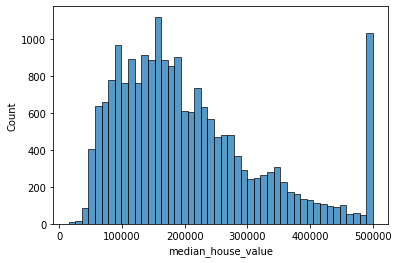

In [9]:
sns.histplot(df.median_house_value) # Plots a histogram of the 
# median_house_value column.

# **Question 1: Feature with Missing Values**

In [10]:
df = df.drop('ocean_proximity',axis = 1) # Remove the ocean_proximity column;
# store as df to generate new dataframe.

In [11]:
columns = df.columns # Return columns for dataframe
columns # Display columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [12]:
df.info() # Display the dataframe to verify dropped column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
check_nulls = df.isnull().sum() # Displays all columns; global check for
# missing values; displays as check_nulls
check_nulls # Display

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 1 Solution:

In [14]:
missing_values = df.isnull().sum()[df.isnull().sum() > 0] # Filters out columns
# without missing values; displays only columns with missing values; stored
# as missing_values
missing_values # Display

total_bedrooms    207
dtype: int64

# **Question 2: Median for the Population Variable**

In [15]:
median_house_value = df['median_house_value'].median()
median_house_value # Display

179700.0

In [16]:
print(f"Median (50th percentile) for the population variable is: {median_house_value}") # Show median

Median (50th percentile) for the population variable is: 179700.0


## Question 2 Solution:

In [17]:
median_population = df['population'].median()
median_population # Display

1166.0

## Shuffle Dataset - Seed 42

In [18]:
np.random.seed(42) # Shuffle dataframe; seed 42

In [19]:
n = len(df) # Length of the dataframe; stored as n.
n # Display

20640

## Split the Data

In [20]:
n_val = int(n * 0.2) # Validation data; 20% of the total n; stored as n_val
n_val # Display

4128

In [21]:
n_test = int(n * 0.2) # Test data; 20% of the total n; stored as n_test
n_test # Display

4128

In [22]:
n_train = int(n - n_val - n_test) # Training data equals the difference between
# entire data set, with n_val and n_test subtracted from total dataset; stored
# as n_train.
n_train # Display

12384

In [23]:
n, n_train + n_val + n_test # Sanity check

(20640, 20640)

## Shuffle Dataframe

In [24]:
idx = np.arange(n) # Generates an array of numbers from 1 to (n - 1); uses NumPy 
# function called arange; stored as idx (short for index).
idx # Display

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [25]:
np.random.seed(42) # Establish a reproduceable shuffle
np.random.shuffle(idx) # Shuffle the index.
idx # Display

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [26]:
df_train = df.iloc[idx[:n_train]] # Locks the beginning 12,384 indexes in the
 # newly-shuffled index; stored as df_train.
df_val = df.iloc[idx[n_train:n_train + n_val]] # Locks the next 4,128 indexes up 
 # to the test dataframe; stored as df_val.
df_test = df.iloc[idx[n_train + n_val:]] # Locks the remaining 4,128 indexes in 
# the dataframe; stored as df_test.

In [27]:
df_train.head() # Display shuffled training dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [28]:
df_val.head() # Display shuffled validation dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19660,-120.85,37.51,15.0,1131.0,285.0,728.0,281.0,1.5531,93100.0
4415,-118.25,34.09,52.0,1866.0,470.0,1211.0,417.0,2.9350,189400.0
18113,-122.02,37.31,34.0,2629.0,433.0,1301.0,431.0,6.0830,341400.0
17673,-121.88,37.30,16.0,2692.0,749.0,1674.0,681.0,2.6763,191100.0
16992,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0


In [29]:
df_test.head() # Display shuffled test dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9221,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0
10234,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0
4763,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0
9062,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500,107500.0
1874,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806,107200.0


## Log Transformation

In [30]:
# Apply log transformation to median_house_value

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

## Verify 'median_house_value' is Not in Dataframe

In [31]:
# Delete the median_house_value from each of the partitioned dataframes

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [32]:
df_train.columns # Display columns to verify median_house_value was removed

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [33]:
df_val.columns # Display columns to verify median_house_value was removed

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [34]:
df_test.columns # Display columns to verify median_house_value was removed

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

# **Question 3: Root Mean Square Error**

In [35]:
missing_values # Display

total_bedrooms    207
dtype: int64

## Linear Regression & RMSE Functions

In [36]:
def train_linear_regression(X, y): # Implement the training program.
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [37]:
def prepare_X(df):
    df_num = df_train.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [38]:
def rmse(y, y_pred):
  error = y - y_pred # Difference between y and y_pred
  se = error ** 2 # Square to eliminate negative values; square error correction
  mse = se.mean() # Finds the mean square error
  return np.sqrt(mse) # Finds square root of mse

## Fill with Zeros

In [39]:
X_train_zeros = df_train.fillna(0) # Fill the null values with 0; 
X_val_zeros = df_val.fillna(0)

In [40]:
bias_zeros, weights_zeros = train_linear_regression(X_train_zeros, y_train)
np.round(bias_zeros, 2),  weights_zeros

(-11.69,
 array([-2.76255120e-01, -2.82087184e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [41]:
y_pred_zeros = bias_zeros + X_val_zeros.dot(weights_zeros) # Establish the prediction 
# for y; store as y_pred
y_pred_zeros # Display y_pred

19660    11.468796
4415     12.058235
18113    12.655293
17673    12.095241
16992    12.631020
           ...    
20011    11.491887
12225    11.540123
1051     11.682920
14519    12.178823
11410    12.235890
Length: 4128, dtype: float64

## RMSE - Zeros

In [42]:
rmse_zeros = rmse(y_val, y_pred_zeros)
rmse_zeros

0.32953303652286225

In [43]:
rmse_zeros_round = round(rmse(y_val, y_pred_zeros), 2)
rmse_zeros_round

0.33

##  Fill with Column Mean

In [44]:
X_train_mean = df_train.fillna(df_train.mean()) # Fill the null values with
# fill with the mean of the column.
X_val_mean = df_val.fillna(df_val.mean())

In [45]:
bias_mean, weights_mean = train_linear_regression(X_train_mean, y_train)
np.round(bias_mean, 2), weights_mean

(-11.76,
 array([-2.76809637e-01, -2.82182103e-01,  2.93033801e-03, -1.48543785e-05,
         2.48054046e-04, -2.03763456e-04,  4.87004092e-04,  1.73086593e-01]))

In [46]:
y_pred_mean = bias_mean + X_val_mean.dot(weights_mean) # Establish the prediction 
# for y; store as y_pred
y_pred_mean # Display y_pred

19660    11.463382
4415     12.059138
18113    12.654182
17673    12.099047
16992    12.634023
           ...    
20011    11.486175
12225    11.536675
1051     11.681352
14519    12.174048
11410    12.240262
Length: 4128, dtype: float64

## RMSE - Mean

In [47]:
rmse_mean = rmse(y_val, y_pred_mean)
rmse_mean

0.3290195439004283

In [48]:
rmse_mean_round = round(rmse(y_val, y_pred_mean), 2)
rmse_mean_round

0.33

## Questions 3 Solution:

### Compare Zeros vs. Means

In [49]:
print(f'''

          rmse_zeros =  {rmse_zeros}
          rmse_mean = {rmse_mean}
          bias_mse_zero = {bias_zeros}
          bias_mse_mean = {bias_mean}

''')




          rmse_zeros =  0.32953303652286225
          rmse_mean = 0.3290195439004283
          bias_mse_zero = -11.686975242036546
          bias_mse_mean = -11.759590872680436




# **Question 4: Training a Regularized Linear Regression**

In [50]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

## Question 4 Solution:

In [51]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train_zeros, y_train, r=r)
    y_pred = w_0 + X_val_zeros.dot(w)
    # print(w_0, w)
    # print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[0], w[7]))
    print(f'RMSE for r = {r} is: {round(rmse(y_val, y_pred), 2)}')
    

RMSE for r = 0 is: 0.33
RMSE for r = 1e-06 is: 0.33
RMSE for r = 0.0001 is: 0.33
RMSE for r = 0.001 is: 0.33
RMSE for r = 0.01 is: 0.33
RMSE for r = 0.1 is: 0.33
RMSE for r = 1 is: 0.33
RMSE for r = 5 is: 0.34
RMSE for r = 10 is: 0.34


In [52]:
print(f'The best RSME is generated from r = 0.001')

The best RSME is generated from r = 0.001


# **Question 5: Splitting the Data to Standard Deviation Scores**

In [53]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
results = []

for i in seed_values:

  # Create a random seed for each seed_value

  np.random.seed(i) # Establish a reproduceable shuffle

  n = len(df) # Length of the dataframe; stored as n.

  # Data split amount

  n_val = int(n * 0.2) # Validation data; 20% of the total n; stored as n_val
  n_test = int(n * 0.2) # Test data; 20% of the total n; stored as n_test
  n_train = int(n - n_val - n_test) # Training data equals the difference between
  # entire data set, with n_val and n_test subtracted from total dataset; stored
  # as n_train.

  # Shuffle

  idx = np.arange(n) # Generates an array of numbers from 1 to (n - 1); uses NumPy 
  # function called arange; stored as idx (short for index).
  np.random.shuffle(idx) # Shuffle the index.

  # Data split

  df_train_std = df.iloc[idx[:n_train]] # Locks the beginning 12,384 indexes in the
  # newly-shuffled index; stored as df_train.
  df_val_std = df.iloc[idx[n_train:n_train + n_val]] # Locks the next 4,128 indexes up 
  # to the test dataframe; stored as df_val.
  df_test_std = df.iloc[idx[n_train + n_val:]] # Locks the remaining 4,128 indexes in 
  # the dataframe; stored as df_test.

  # y split

  y_train_std = np.log1p(df_train_std.median_house_value.values)
  y_val_std = np.log1p(df_val_std.median_house_value.values)
  y_test_std = np.log1p(df_test_std.median_house_value.values)

  # Remove target variable y from data partitions

  del df_train_std['median_house_value']
  del df_val_std['median_house_value']
  del df_test_std['median_house_value']

  # Replace null values with 0

  X_train_zeros_std = df_train_std.fillna(0) # Fill the null values with 0; 
  X_val_zeros_std = df_val_std.fillna(0)

  # Linear Regression

  bias_zeros_std, weights_zeros_std = train_linear_regression(X_train_zeros_std, y_train_std)

  # Regression - y prediction

  y_pred_zeros_std = bias_zeros_std + X_val_zeros_std.dot(weights_zeros_std) # Establish the prediction 
  # for y; store as y_pred_std

  # RMSE Call

  rmse_std = rmse(y_val_std, y_pred_zeros_std)

  results.append(np.round(rmse_std, 3))

results_array = np.array(results)

std_results = round(np.std(results_array), 3)

## Question 5 Solution:

In [54]:
std_results

0.004

# **Question 6: Combining Train and Validation Datasets**

In [55]:
np.random.seed(9) # Establish a reproduceable shuffle

n = len(df) # Length of the dataframe; stored as n.

# Data split amount


n_val = int(n * 0.2) # Validation data; 20% of the total n; stored as n_val
n_test = int(n * 0.2) # Test data; 20% of the total n; stored as n_test
n_train = int(n - n_val - n_test) # Training data equals the difference between
# entire data set, with n_val and n_test subtracted from total dataset; stored
# as n_train.

# Shuffle

idx = np.arange(n) # Generates an array of numbers from 1 to (n - 1); uses NumPy 
# function called arange; stored as idx (short for index).
np.random.shuffle(idx) # Shuffle the index.

# Data split

df_train_9= df.iloc[idx[:n_train]].copy() # Locks the beginning 12,384 indexes in the
# newly-shuffled index; stored as df_train.
df_val_9= df.iloc[idx[n_train:n_train + n_val]].copy() # Locks the next 4,128 indexes up 
# to the test dataframe; stored as df_val.
df_test_9= df.iloc[idx[n_train + n_val:]].copy() # Locks the remaining indexes in 
# the dataframe; stored as df_test.
# Remove target variable y from data partitions
  
y_train_9 = np.log1p(df_train_9.median_house_value.values)
y_val_9 = np.log1p(df_val_9.median_house_value.values)
y_test_9 = np.log1p(df_test_9.median_house_value.values)

del df_train_9['median_house_value']
del df_val_9['median_house_value']
del df_test_9['median_house_value']

X_train_9 = df_train.fillna(0) # Fill the null values with 0;
X_val_9 = df_val.fillna(0)
X_test_9 = df_test.fillna(0) # Fill the null values with 0;


# Concatenate the train and validation sets

X_train_full = pd.concat([X_train_9, X_val_9])

y_train_full = np.concatenate([y_train_9, y_val_9])

# Train the model on the full training set
bias_full, weights_full = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)

# Make predictions on the test set

y_pred_full = bias_full + X_test_9.dot(weights_full) # Establish the prediction


# RMSE Call

rmse_full = rmse(y_test_9, y_pred_full)

## Question 6 Solution:

In [56]:
# print(rmse_full)
print(f'RMSE for the model: {round(rmse_full, 3)}')

RMSE for the model: 0.58


In [57]:
df_train_9.shape

(12384, 8)